# Plot & analyse results

In [21]:
import os
import pandas as pd
import numpy as np
import glob
import seaborn as sns
from matplotlib import pyplot as plt
import statistics

In [22]:
# Read in data

df_gschwind = pd.read_csv('/cubric/data/c1639425/Monkey_Brains/results_df/proportion_gschwind_bst_ncc_subic_antthal_globpal_df')
display(df_gschwind)

#df_eickhoff = pd.read_csv('/cubric/data/c1639425/Monkey_Brains/proportion_eickhoff_distance_corrected_just_subiculum_streamline_corrected_hipp_ant_thal_caudate_df')
#display(df_eickhoff)

df_eickhoff = pd.read_csv('/cubric/data/c1639425/Monkey_Brains/results_df/proportion_eickhoff_streamline_corrected_bst_subic_ncc_ant_thal_extglobpal_df')
display(df_eickhoff)

df_raw_data = pd.read_csv('/cubric/data/c1639425/Monkey_Brains/results_df/distance_corrected_raw_data_bst_subic_ncc_ant_thal_extGP_df')
display(df_raw_data)

,Subjects,bst_ncc,bst_subic,bst_ant_thal,bst_ext_glob_pal,ncc_subic,ncc_ant_thal,ncc_ext_glob_pal,subic_ant_thal,subic_ext_glob_pal,ant_thal_ext_glob_pal
0,sub-01,0.050170,0.025901,0.082977,0.173572,0.008876,0.014458,0.048230,0.048905,0.010219,0.036693
1,sub-02,0.169803,0.019796,0.076487,0.036706,0.019890,0.090345,0.032345,0.006288,0.035273,0.013066
2,sub-03,0.178681,0.001767,0.032854,0.068894,0.000613,0.002625,0.192627,0.000703,0.002391,0.018844
3,sub-04,0.185075,0.003642,0.147056,0.077205,0.001145,0.031229,0.026665,0.007434,0.000716,0.019834
4,sub-05,0.147443,0.009816,0.134834,0.069021,0.004128,0.059438,0.007952,0.033732,0.004090,0.029546
5,sub-06,0.183732,0.026253,0.050042,0.088010,0.007196,0.013542,0.017314,0.103301,0.005375,0.005235
6,sub-07,0.178001,0.001107,0.169654,0.040871,0.000201,0.041096,0.027011,0.017743,0.000672,0.023645
7,sub-08,0.203361,0.018644,0.131232,0.031820,0.008789,0.053869,0.002578,0.045609,0.002147,0.001953
8,sub-09,0.118152,0.009493,0.106808,0.103117,0.007855,0.060669,0.031366,0.031068,0.004383,0.027088


,Subjects,bst_ncc,bst_subic,bst_ant_thal,bst_ext_glob_pal,ncc_bst,ncc_subic,ncc_ant_thal,ncc_ext_glob_pal,subic_bst,...,subic_ant_thal,subic_ext_glob_pal,ant_thal_bst,ant_thal_ncc,ant_thal_subic,ant_thal_ext_glob_pal,ext_glob_pal_bst,ext_glob_pal_ncc,ext_glob_pal_subic,ext_glob_pal_ant_thal
0,sub-01,0.042854,0.024687,0.465202,0.053106,0.096006,0.006736,0.054785,0.015614,0.078417,...,0.161058,0.003565,0.531346,0.022507,0.160806,0.026825,0.070004,0.003806,0.001225,0.024939
1,sub-02,0.184211,0.033264,0.601311,0.015544,0.213540,0.007951,0.145835,0.003030,0.098549,...,0.045429,0.020486,0.888996,0.188227,0.016735,0.008018,0.051936,0.013179,0.011083,0.025571
2,sub-03,0.080588,0.001438,0.114982,0.052167,0.109188,0.000024,0.001358,0.012211,0.063392,...,0.014521,0.008992,0.725923,0.013243,0.004067,0.043827,0.021746,0.016036,0.000210,0.008754
3,sub-04,0.074261,0.001451,0.422288,0.012084,0.114303,0.000200,0.034660,0.002450,0.035380,...,0.133986,0.000819,0.693540,0.043065,0.009972,0.015739,0.043321,0.003008,0.000099,0.014546
4,sub-05,0.073795,0.004565,0.387788,0.009448,0.097204,0.000858,0.079068,0.001007,0.023626,...,0.149153,0.001429,0.501241,0.057382,0.035842,0.008761,0.039599,0.000687,0.000489,0.029245
5,sub-06,0.063873,0.004592,0.091678,0.015579,0.089099,0.000593,0.011915,0.001257,0.018991,...,0.105425,0.000476,0.283009,0.008971,0.071652,0.001526,0.035497,0.001255,0.000349,0.004087
6,sub-07,0.053816,0.000364,0.340180,0.007792,0.076772,0.000024,0.049873,0.002093,0.007087,...,0.152224,0.000365,0.523449,0.011740,0.022781,0.010688,0.020031,0.003904,0.000172,0.029122
7,sub-08,0.118072,0.010965,0.311387,0.006233,0.127163,0.002291,0.058764,0.000180,0.050833,...,0.117334,0.000688,0.564004,0.041465,0.060048,0.001120,0.064179,0.001341,0.001056,0.003610
8,sub-09,0.083283,0.010654,0.700971,0.029475,0.142781,0.003077,0.123107,0.005023,0.054893,...,0.207043,0.002181,0.752317,0.094448,0.092915,0.017379,0.071596,0.003808,0.000858,0.031452


,Subjects,bst_ncc,bst_subic,bst_ant_thal,bst_ext_glob_pal,ncc_bst,ncc_subic,ncc_ant_thal,ncc_ext_glob_pal,subic_bst,...,ant_thal_bst,ant_thal_ncc,ant_thal_subic,ant_thal_ext_glob_pal,ext_glob_pal_bst,ext_glob_pal_ncc,ext_glob_pal_subic,ext_glob_pal_ant_thal,Total,Mean_total
0,sub-01,35235.0,23086.0,81964.0,94288.0,47388.0,11101.0,17010.0,48853.0,19569.0,...,54688.0,6800.0,55258.0,17501.0,191562.0,30576.0,11191.0,42928.0,823435.0,78422.380952
1,sub-02,86070.0,19152.0,74317.0,15744.0,259002.0,34111.0,134300.0,22867.0,21077.0,...,81118.0,49299.0,5401.0,4552.0,58850.0,42865.0,44420.0,22000.0,1016094.0,96770.857143
2,sub-03,29310.0,618.0,8272.0,40553.0,182965.0,146.0,1388.0,134905.0,1481.0,...,30759.0,1731.0,628.0,12244.0,41294.0,93938.0,1456.0,10143.0,594005.0,56571.904762
3,sub-04,71527.0,1623.0,70128.0,24750.0,86583.0,589.0,15147.0,13205.0,1488.0,...,55502.0,11532.0,3100.0,8962.0,41206.0,9575.0,367.0,7982.0,427151.0,40681.047619
4,sub-05,72076.0,5049.0,76152.0,20165.0,76379.0,2365.0,38703.0,5355.0,4834.0,...,59608.0,21143.0,14953.0,7054.0,49330.0,2652.0,2139.0,22695.0,503433.0,47946.000000
5,sub-06,43952.0,3526.0,13281.0,23020.0,86256.0,1964.0,7442.0,8006.0,15079.0,...,22183.0,2155.0,19204.0,787.0,39351.0,4264.0,1322.0,2923.0,354342.0,33746.857143
6,sub-07,61905.0,501.0,72465.0,18922.0,78276.0,89.0,28250.0,13517.0,371.0,...,61143.0,4114.0,9546.0,7907.0,13265.0,7755.0,408.0,10714.0,393765.0,37501.428571
7,sub-08,103985.0,11195.0,57258.0,11431.0,100357.0,7479.0,34555.0,1058.0,7539.0,...,74607.0,19574.0,32863.0,1101.0,20543.0,1532.0,1399.0,861.0,502413.0,47848.857143
8,sub-09,70981.0,10872.0,115199.0,53847.0,164243.0,12944.0,83415.0,37837.0,8028.0,...,97440.0,37369.0,44016.0,14739.0,151445.0,24608.0,6637.0,39189.0,995428.0,94802.666667


# Plot Raw Data

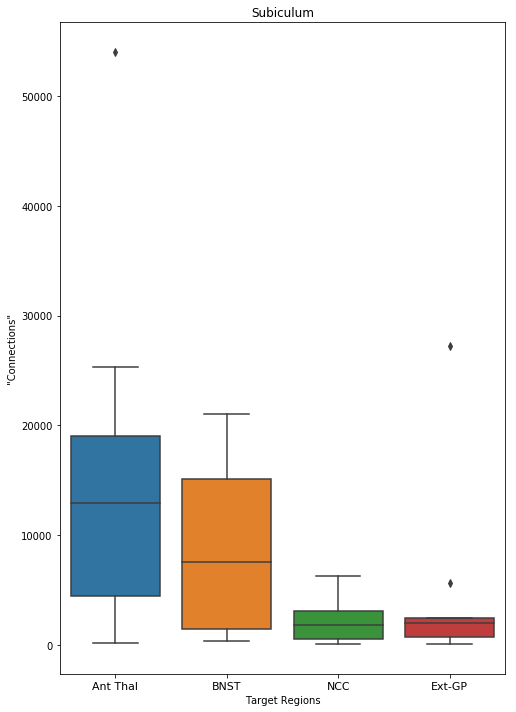

In [23]:
raw_figure, axes = plt.subplots(figsize=(20,10))

# ax1 - Subic Connections
subic_data = df_raw_data[['subic_ant_thal','subic_bst','subic_ncc','subic_ext_glob_pal']]
ax1 = plt.subplot(1,3,1)
sns.boxplot(ax = ax1, x = "variable", y = "value", data = pd.melt(subic_data))
ax1.set_xticklabels(['Ant Thal','BNST','NCC','Ext-GP'], fontsize = 11)
ax1.set_title('Subiculum')
ax1.set_xlabel('Target Regions')
ax1.set_ylabel('\"Connections\"')


raw_figure.tight_layout()
raw_figure.savefig('/home/c1639425/Desktop/Monkey_processing/Multiple_roi_results/raw_data_dist_corrected.png')

## Plot Gschwind 

In [8]:
list(df_gschwind.columns)

['Subjects',
 'bst_ncc',
 'bst_subic',
 'bst_ant_thal',
 'bst_ext_glob_pal',
 'ncc_subic',
 'ncc_ant_thal',
 'ncc_ext_glob_pal',
 'subic_ant_thal',
 'subic_ext_glob_pal',
 'ant_thal_ext_glob_pal']

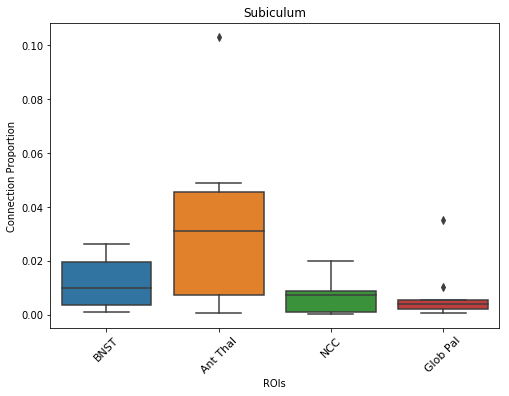

In [24]:
# PLOT GSCHWIND

axis_names = list(df_gschwind.columns.values)[1:] 
gschwind_figure, axes = plt.subplots(figsize=(20,10))


# ax1 - Subic Connections
subic_data = df_gschwind[['bst_subic','subic_ant_thal','ncc_subic','subic_ext_glob_pal',]]
ax1 = plt.subplot(2,3,1)
sns.boxplot(ax = ax1, x = "variable", y = "value", data = pd.melt(subic_data))
ax1.set_xticklabels(['BNST', 'Ant Thal','NCC','Glob Pal',], fontsize = 11)
ax1.set_title('Subiculum')
ax1.set_xlabel('ROIs')
ax1.set_ylabel('Connection Proportion')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

gschwind_figure.tight_layout()
gschwind_figure.savefig('/home/c1639425/Desktop/Monkey_processing/Multiple_roi_results/gschwind_bst_ncc_subic_antthal_globpal.png')


## Run t-tests

In [28]:
test_df = df_gschwind[['Subjects','bst_subic','subic_ant_thal','ncc_subic','subic_ext_glob_pal',]]
test_long = pd.melt(test_df, id_vars=['Subjects'], value_vars=['bst_subic','subic_ant_thal','ncc_subic','subic_ext_glob_pal'])
print(test_long)

   Subjects            variable     value
0    sub-01           bst_subic  0.025901
1    sub-02           bst_subic  0.019796
2    sub-03           bst_subic  0.001767
3    sub-04           bst_subic  0.003642
4    sub-05           bst_subic  0.009816
5    sub-06           bst_subic  0.026253
6    sub-07           bst_subic  0.001107
7    sub-08           bst_subic  0.018644
8    sub-09           bst_subic  0.009493
9    sub-01      subic_ant_thal  0.048905
10   sub-02      subic_ant_thal  0.006288
11   sub-03      subic_ant_thal  0.000703
12   sub-04      subic_ant_thal  0.007434
13   sub-05      subic_ant_thal  0.033732
14   sub-06      subic_ant_thal  0.103301
15   sub-07      subic_ant_thal  0.017743
16   sub-08      subic_ant_thal  0.045609
17   sub-09      subic_ant_thal  0.031068
18   sub-01           ncc_subic  0.008876
19   sub-02           ncc_subic  0.019890
20   sub-03           ncc_subic  0.000613
21   sub-04           ncc_subic  0.001145
22   sub-05           ncc_subic  0

In [23]:
from scipy import stats
subic_result = stats.wilcoxon(x = subic_data['bst_subic'], y=subic_data['ncc_subic'], zero_method='wilcox', correction=False)
print(subic_result)

WilcoxonResult(statistic=2.0, pvalue=0.015155973880974605)
WilcoxonResult(statistic=4.0, pvalue=0.028401837044201694)
WilcoxonResult(statistic=0.0, pvalue=0.007685794055213263)


## Plot Eickhoff Method, subic only

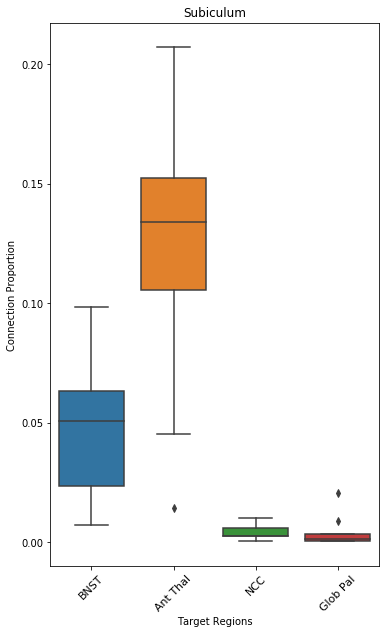

In [18]:
axis_names = list(df_eickhoff.columns.values)[1:] 

eickhoff_figure, axes = plt.subplots(figsize=(20,10))


# ax1 - Subic Connections
subic_data = df_eickhoff[['subic_bst','subic_ant_thal','subic_ncc','subic_ext_glob_pal']]
ax1 = plt.subplot(1,3,1)
sns.boxplot(ax = ax1, x = "variable", y = "value", data = pd.melt(subic_data))
ax1.set_xticklabels(['BNST','Ant Thal','NCC','Glob Pal'], fontsize = 11)
ax1.set_title('Subiculum')
ax1.set_xlabel('Target Regions')
ax1.set_ylabel('Connection Proportion')
#ax1.set_ylim(0,0.6)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

eickhoff_figure.savefig('/home/c1639425/Desktop/Monkey_processing/Multiple_roi_results/eickhoff_bst_ncc_subic_antthal_globpal.png')

# Eickhoff, all ROIS

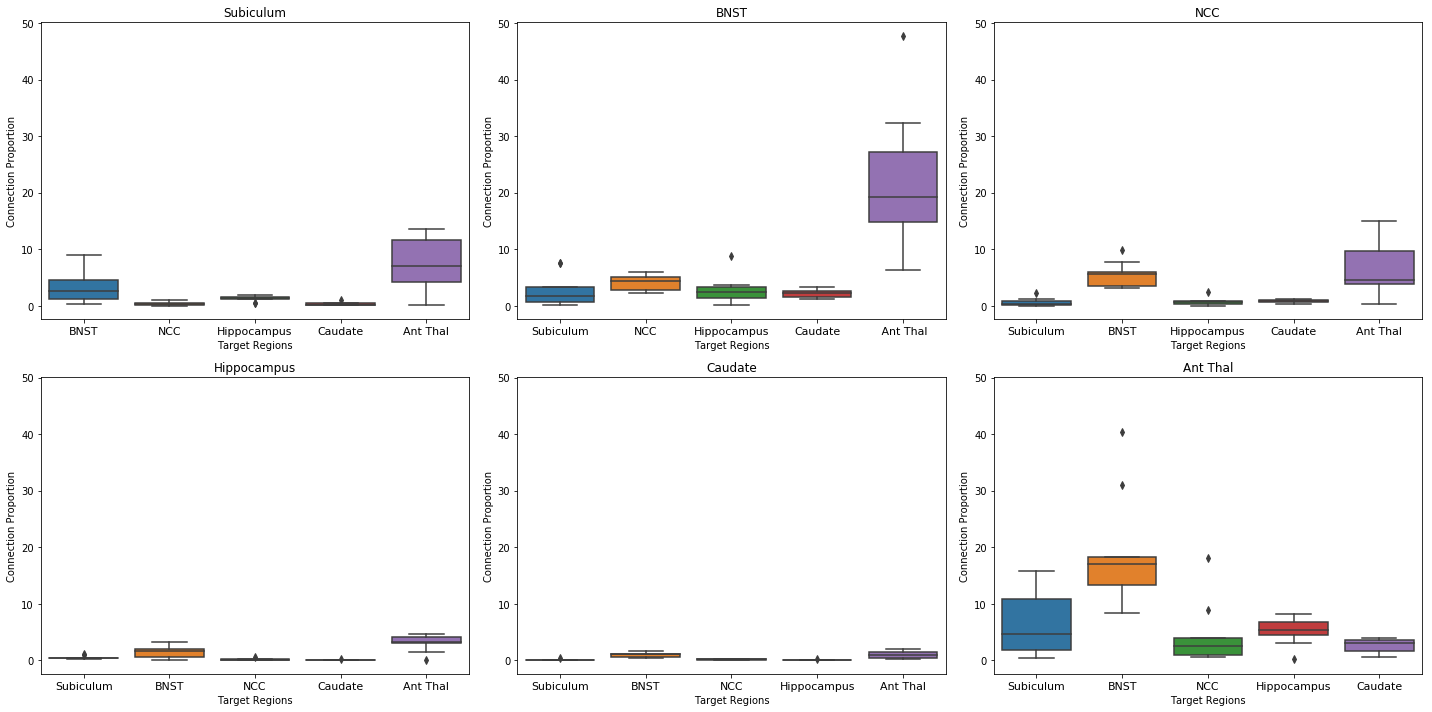

In [35]:
eickhoff_figure, axes = plt.subplots(figsize=(20,10))


# ax1 - Subic Connections
subic_data = df_eickhoff[['subic_bst','subic_ncc','subic_hippocampus','subic_caudate','subic_ant_thal']]
ax1 = plt.subplot(2,3,1)
sns.boxplot(ax = ax1, x = "variable", y = "value", data = pd.melt(subic_data))
ax1.set_xticklabels(['BNST','NCC','Hippocampus', 'Caudate','Ant Thal'], fontsize = 11)
ax1.set_title('Subiculum')
ax1.set_xlabel('Target Regions')
ax1.set_ylabel('Connection Proportion')
#ax1.set_ylim(0,0.6)
#plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)                    
  

# ax2 - BST Connections
bst_connections = df_eickhoff[['bst_subic','bst_ncc','bst_hippocampus','bst_caudate','bst_ant_thal']]
ax2 = plt.subplot(2,3,2, sharey = ax1)
sns.boxplot(ax = ax2, x = "variable", y = "value", data = pd.melt(bst_connections))
ax2.set_xticklabels(['Subiculum', 'NCC', 'Hippocampus', 'Caudate', ' Ant Thal'], fontsize = 11)
ax2.set_title('BNST')
ax2.set_xlabel('Target Regions')
ax2.set_ylabel('Connection Proportion')
#plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)                    
  

# ax3 - NCC Connections
ncc_connections = df_eickhoff[['ncc_subic','ncc_bst','ncc_hippocampus','ncc_caudate','ncc_ant_thal']]
ax3 = plt.subplot(2,3,3, sharey = ax1)
sns.boxplot(ax = ax3, x = "variable", y = "value", data = pd.melt(ncc_connections))
ax3.set_xticklabels(['Subiculum', 'BNST', 'Hippocampus', 'Caudate', 'Ant Thal'], fontsize = 11)
ax3.set_title('NCC')
ax3.set_xlabel('Target Regions')
ax3.set_ylabel('Connection Proportion')
#plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)                    
  

# ax4 - Hippocampus Connections
hippocampus_connections = df_eickhoff[['hippocampus_subic','hippocampus_bst','hippocampus_ncc','hippocampus_caudate','hippocampus_ant_thal']]
ax4 = plt.subplot(2,3,4,sharey = ax1)
sns.boxplot(ax = ax4, x = "variable", y = "value", data = pd.melt(hippocampus_connections))
ax4.set_xticklabels(['Subiculum','BNST','NCC','Caudate','Ant Thal'], fontsize = 11)
ax4.set_title('Hippocampus')
ax4.set_xlabel('Target Regions')
ax4.set_ylabel('Connection Proportion')
#plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)


# ax5 - Caudate Connections
caudate_connections = df_eickhoff[['caudate_subic','caudate_bst','caudate_ncc','caudate_hippocampus','caudate_ant_thal']]
ax5 = plt.subplot(2,3,5,sharey = ax1)
sns.boxplot(ax = ax5, x = "variable", y = "value", data = pd.melt(caudate_connections))
ax5.set_xticklabels(['Subiculum','BNST','NCC','Hippocampus','Ant Thal'], fontsize = 11)
ax5.set_title('Caudate')
ax5.set_xlabel('Target Regions')
ax5.set_ylabel('Connection Proportion')
#plt.setp(ax5.xaxis.get_majorticklabels(), rotation=45)


# ax6 - Ant Thal Connections
ant_thal_connections = df_eickhoff[['ant_thal_subic','ant_thal_bst','ant_thal_ncc','ant_thal_hippocampus','ant_thal_caudate']]
ax6 = plt.subplot(2,3,6,sharey = ax1)
sns.boxplot(ax = ax6, x = "variable", y = "value", data = pd.melt(ant_thal_connections))
ax6.set_xticklabels(['Subiculum','BNST','NCC','Hippocampus','Caudate'], fontsize = 11)
ax6.set_title('Ant Thal')
ax6.set_xlabel('Target Regions')
ax6.set_ylabel('Connection Proportion')
#plt.setp(ax6.xaxis.get_majorticklabels(), rotation=45)                    
                     
                     
eickhoff_figure.tight_layout()
eickhoff_figure.savefig('/home/c1639425/Desktop/Monkey_processing/Multiple_roi_results/eickhoff_all_distance_corrected.png')

In [26]:
from scipy import stats
subic_result = stats.wilcoxon(x = subic_data['subic_bst'], y=subic_data['subic_ncc'], zero_method='wilcox', correction=False)
print(subic_result)
bnst_result = stats.wilcoxon(x = bst_connections['bst_ncc'], y=bst_connections['bst_subic'], zero_method='wilcox', correction=False)
print(bnst_result)
ncc_result = stats.wilcoxon(x = ncc_connections['ncc_subic'], y=ncc_connections['ncc_bst'], zero_method='wilcox', correction=False)
print(ncc_result)


WilcoxonResult(statistic=0.0, pvalue=0.007685794055213263)
WilcoxonResult(statistic=3.0, pvalue=0.020879263166351643)
WilcoxonResult(statistic=0.0, pvalue=0.007685794055213263)


## Plot mean ROI sizes

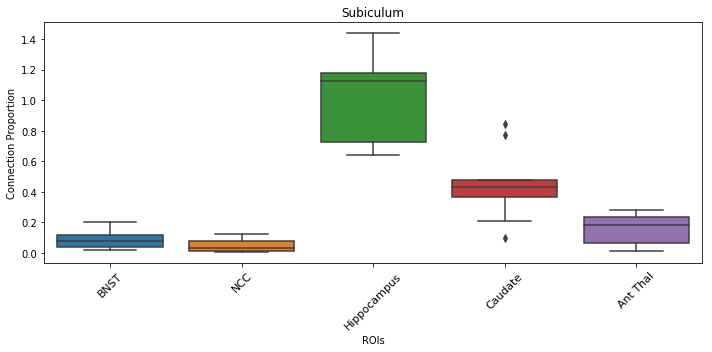

In [27]:
gschwind_just_subic, axes = plt.subplots(figsize=(10,5))


# ax1 - Subic Connections
subic_data = df_gschwind[['bst_subic','ncc_subic','subic_hippocampus','subic_caudate','subic_ant_thal']]
ax1 = plt.subplot(1,1,1)
sns.boxplot(ax = ax1, x = "variable", y = "value", data = pd.melt(subic_data))
ax1.set_xticklabels(['BNST', 'NCC','Hippocampus','Caudate','Ant Thal'], fontsize = 11)
ax1.set_title('Subiculum')
ax1.set_xlabel('ROIs')
ax1.set_ylabel('Connection Proportion')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

gschwind_just_subic.tight_layout()

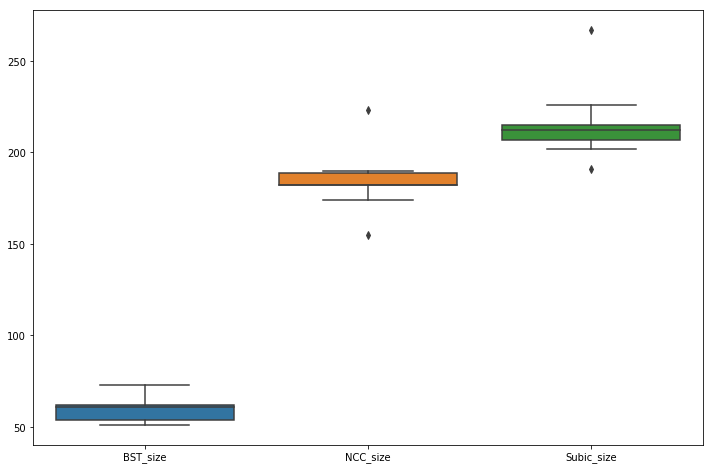

In [80]:
means = connections_df.mean(axis = 0, numeric_only= True) 
sems = connections_df.sem(axis = 0, numeric_only=True)
z_score = 1.96
lcb = means - z_score* sems
ucb = means + z_score* sems

mean_vols =  before_multiplication_df.mean(axis = 0, numeric_only= True) 
stds_vols = before_multiplication_df.std(axis = 0, numeric_only=True)
plot_roi_sizes = before_multiplication_df.drop(['Subjects'], axis = 1)

fig, ax = plt.subplots(figsize = (12,8))
ax = sns.boxplot(ax = ax, data = plot_roi_sizes)
fig.savefig('/home/c1639425/Desktop/Monkey_processing/Multiple_roi_results/subic_tracts_bst_sizes.png')

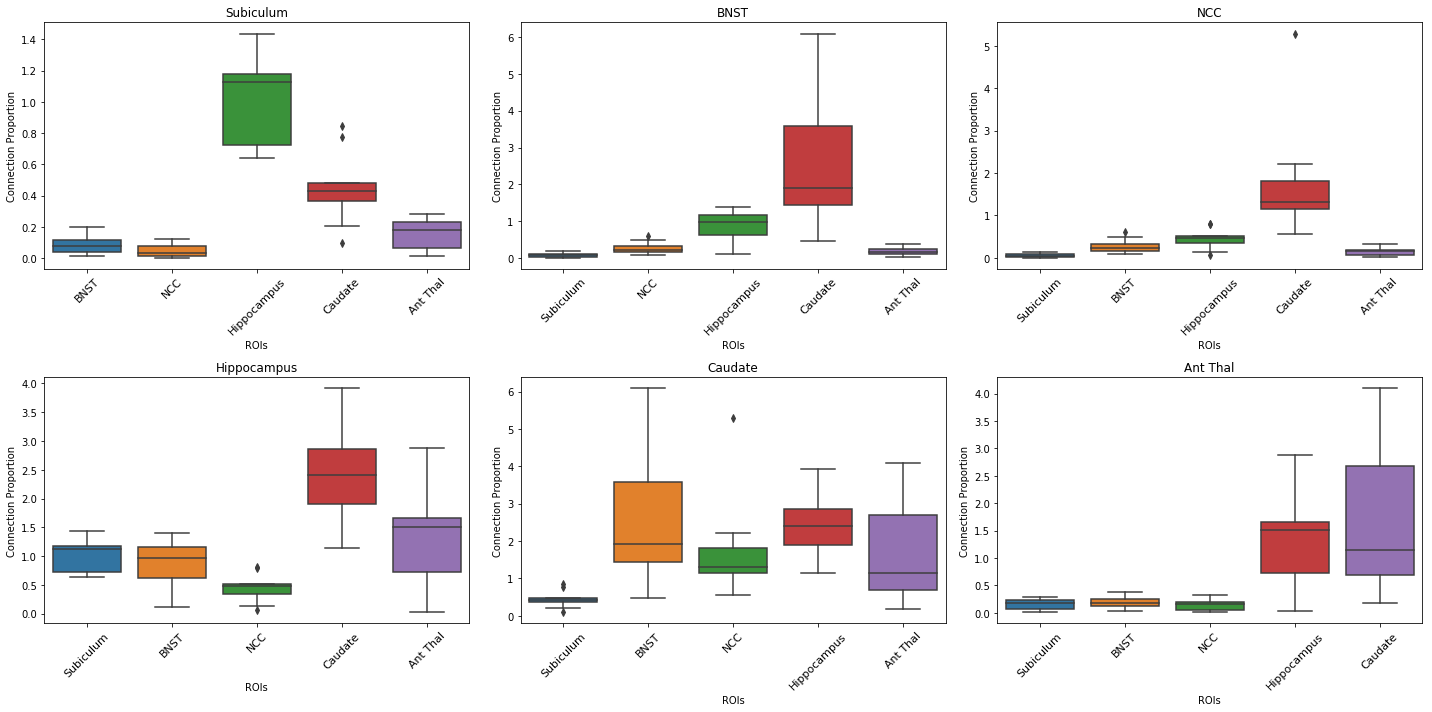

In [38]:
# ax2 - BST Connections
bst_connections = df_gschwind[['bst_subic','bst_ncc','bst_hippocampus','bst_caudate','bst_ant_thal']]
ax2 = plt.subplot(2,3,2)
sns.boxplot(ax = ax2, x = "variable", y = "value", data = pd.melt(bst_connections))
ax2.set_xticklabels(['Subiculum', 'NCC','Hippocampus','Caudate','Ant Thal'], fontsize = 11)
ax2.set_title('BNST')
ax2.set_xlabel('ROIs')
ax2.set_ylabel('Connection Proportion')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)


# ax3 - NCC Connections
ncc_connections = df_gschwind[['ncc_subic','bst_ncc','ncc_hippocampus','ncc_caudate','ncc_ant_thal']]
ax3 = plt.subplot(2,3,3)
sns.boxplot(ax = ax3, x = "variable", y = "value", data = pd.melt(ncc_connections))
ax3.set_xticklabels(['Subiculum', 'BNST','Hippocampus','Caudate','Ant Thal'], fontsize = 11)
ax3.set_title('NCC')
ax3.set_xlabel('ROIs')
ax3.set_ylabel('Connection Proportion')
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)


# ax4 - Hippocampus Connections
hippocampus_connections = df_gschwind[['subic_hippocampus','bst_hippocampus','ncc_hippocampus','hippocampus_caudate','hippocampus_ant_thal']]
ax4 = plt.subplot(2,3,4)
sns.boxplot(ax = ax4, x = "variable", y = "value", data = pd.melt(hippocampus_connections))
ax4.set_xticklabels(['Subiculum','BNST','NCC','Caudate','Ant Thal'], fontsize = 11)
ax4.set_title('Hippocampus')
ax4.set_xlabel('ROIs')
ax4.set_ylabel('Connection Proportion')
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)


# ax5 - Caudate Connections
caudate_connections = df_gschwind[['subic_caudate','bst_caudate','ncc_caudate','hippocampus_caudate','caudate_ant_thal']]
ax5 = plt.subplot(2,3,5)
sns.boxplot(ax = ax5, x = "variable", y = "value", data = pd.melt(caudate_connections))
ax5.set_xticklabels(['Subiculum','BNST','NCC','Hippocampus','Ant Thal'], fontsize = 11)
ax5.set_title('Caudate')
ax5.set_xlabel('ROIs')
ax5.set_ylabel('Connection Proportion')
plt.setp(ax5.xaxis.get_majorticklabels(), rotation=45)


# ax6 - Ant Thal Connections
ant_thal_connections = df_gschwind[['subic_ant_thal','bst_ant_thal','ncc_ant_thal','hippocampus_ant_thal','caudate_ant_thal']]
ax6 = plt.subplot(2,3,6)
sns.boxplot(ax = ax6, x = "variable", y = "value", data = pd.melt(ant_thal_connections))
ax6.set_xticklabels(['Subiculum','BNST','NCC','Hippocampus','Caudate'], fontsize = 11)
ax6.set_title('Ant Thal')
ax6.set_xlabel('ROIs')
ax6.set_ylabel('Connection Proportion')
plt.setp(ax6.xaxis.get_majorticklabels(), rotation=45)

gschwind_figure.tight_layout()

gschwind_figure.savefig('/home/c1639425/Desktop/Monkey_processing/Multiple_roi_results/gschwind_distance_corrected.png')
#stats.ttest_rel(plotting_data['Subic_BST'], plotting_data['Subic_NCC']) 